참고 기출문제 :17회 설문조사 데이터  
1) 항목별, 그룹별 만족도 응답의 평균, 표준편차, 왜도, 첨도 구하기  
2) 응답항목별 차이가 있는지 분석(MANOVA)  
3) 탐색적 요인분석 factor analyze  
4) 신뢰성 지수 개발 (신뢰성 지수 계산 식은 문제에 주어짐)  

만들면서 참조한 페이지
- [주성분분석과 PCA의 차이](https://pizzathief.oopy.io/pca-and-fa)
- [파이썬 요인분석 예시](https://towardsdatascience.com/factor-analysis-a-complete-tutorial-1b7621890e42)
- [파이썬 plot 바깥쪽에 text 쓰기](https://bjy2.tistory.com/166)
- [파이썬 plot 그래프 간 여백 설정하기](https://www.geeksforgeeks.org/how-to-set-the-spacing-between-subplots-in-matplotlib-in-python/)
- [분산분석 정리 - ANOVA와 MANOVA](https://syj9700.tistory.com/15)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 30)

In [3]:
df = pd.read_csv("data/airline_passenger_satisfaction.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [5]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
df.drop(['Unnamed: 0', 'id'], axis = 1, inplace = True)

## 1) 항목별 만족도 응답의 평균, 왜도 , 첨도, 표준편차 구하기

In [5]:
[df.columns[6:20]]

[Index(['Inflight wifi service', 'Departure/Arrival time convenient',
        'Ease of Online booking', 'Gate location', 'Food and drink',
        'Online boarding', 'Seat comfort', 'Inflight entertainment',
        'On-board service', 'Leg room service', 'Baggage handling',
        'Checkin service', 'Inflight service', 'Cleanliness'],
       dtype='object')]

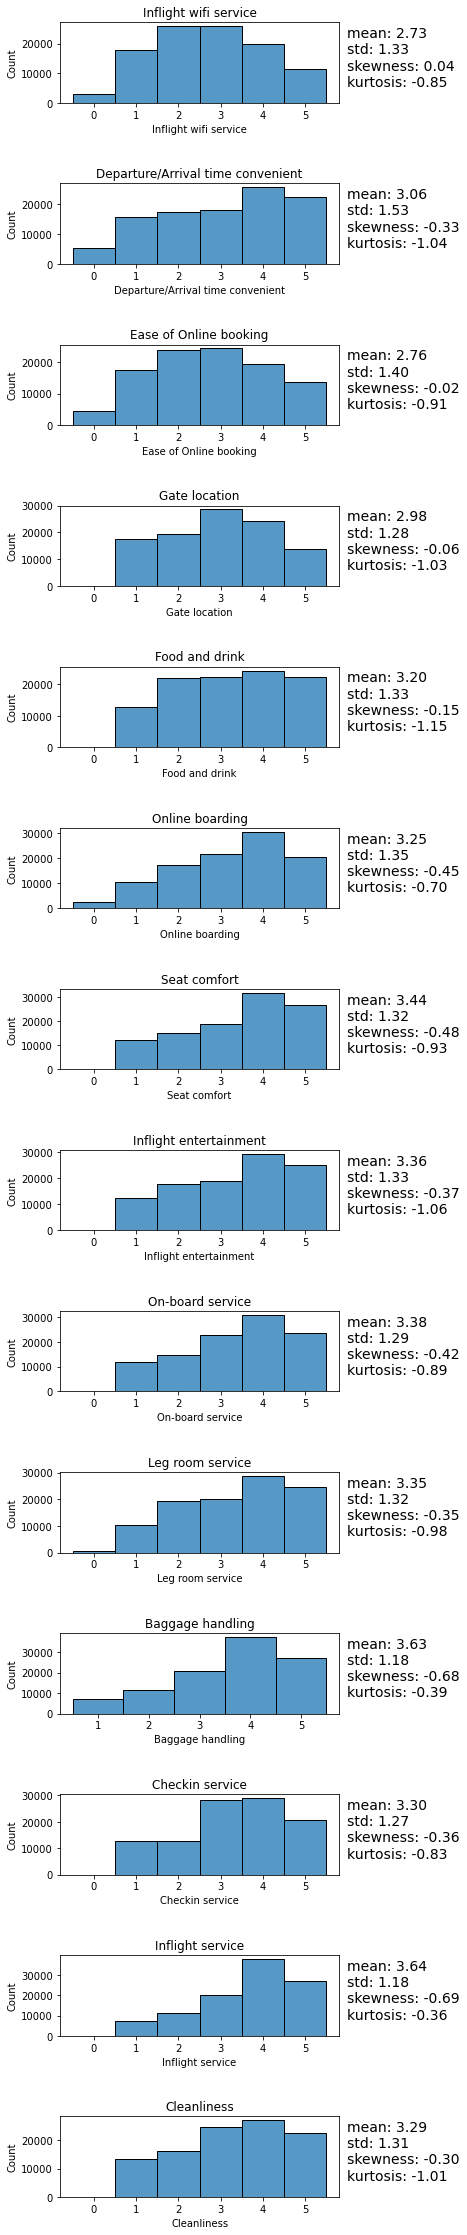

In [17]:
## 분포 그림과 함께 평균, 표준편차, 왜도, 첨도를 나타내보자
import scipy

fig, axs = plt.subplots(14, figsize = (5, 40))
i = 0
for x in df.columns[6:20]:
    sns.histplot(df[x], discrete = True, ax = axs[i])
    textstr = '\n'.join((
        'mean: %.2f' %(np.mean(df[x])),
        'std: %.2f' %(np.std(df[x])),
        'skewness: %.2f' %(scipy.stats.skew(df[x])),
        'kurtosis: %.2f' %(scipy.stats.kurtosis(df[x]))
    ))
    axs[i].set_title(x)
    plt.text(1.03, 0.95, textstr, transform = axs[i].transAxes, fontsize = 14, verticalalignment = 'top')
    i = i+1

plt.subplots_adjust(hspace = 1)   ## fig.tight_layout은 height 간격을 만들어주지는 않아서 내가 만든느 그래프에는 적용할 수 없다
plt.show()

그래프 해석
- 대부분의 서비스 항목이 만족도 평균 3점 초반대를 기록하고 있다. 서비스 항목 중 평균치가 2점 후반인 항목은 Inflight wifi service, Ease of Online booking, Gate location 세 가지였다. 모든 서비스 항목의 분포 첨도는 음수를 기록하고 있으며, 이는 그래프에서 보이듯이 서비스 만족도 결과가 정규분포보다 완만한 모양으로 분포하고 있음을 보여준다. Inflight wifi service를 제외한 모든 만족도 조사 분포 왜도는 음수로, 정도는 다르지만 오른쪽으로 치우친 그래프들이다. 그래프에서 확인할 수 있듯 만족도 조사에서 3,4,5점을 선택한 고객들이 대개 더 많기 때문이다.

## 2) 응답 항목별 차이가 존재하는지 분석

Gender, Customer Type, Type of Travel, Class에 따른 응답 결과의 차이가 있는지 알아보자.
이 경우 종속변수가 두 개 이상이 되기 때문에 MANOVA를 사용하는 것이 좋다 (ANOVA를 중복수행하면 1종오류가 증가하게 된다)
MANOVA는 그룹의 수에 따라 ANOVA와 마찬가지로 One-way MANOVA와 Two-way MANOVA로 나뉘어지는데, 이번 분석의 경우 2-way MANOVA에 해당한다.

<AxesSubplot:>

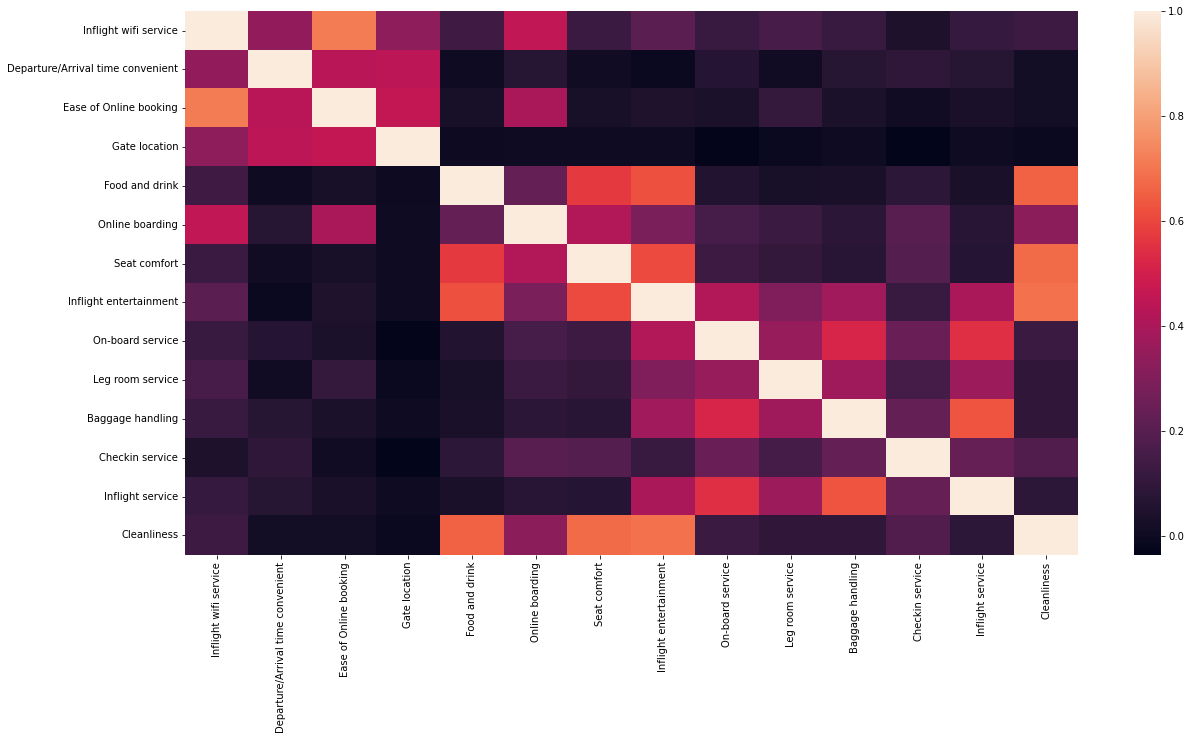

In [19]:
plt.figure(figsize=(20,10))
c= df[df.columns[6:20]].corr()
sns.heatmap(c)

In [22]:
from statsmodels.multivariate.manova import MANOVA
maov = MANOVA.from_formula('+'.join(df.columns[6:20])+'~'+'Gender+Customer Type+Type of Travel+Class', data = df) 
## outcome~ explanatory variables 형태로 작성
## statsmodel 사용할 때 variable에 space나 숫자가 들어가면 안되나보다.. 어떻게 하지?
print(maov.mv_test())

SyntaxError: invalid syntax (<unknown>, line 1)

In [20]:
a = '+'.join(df.columns[6:20])
a

'Inflight wifi service+Departure/Arrival time convenient+Ease of Online booking+Gate location+Food and drink+Online boarding+Seat comfort+Inflight entertainment+On-board service+Leg room service+Baggage handling+Checkin service+Inflight service+Cleanliness'

In [28]:
from patsy.builtins import Q

'+'.join(Q(df.columns[6:20]))+'~'+'Gender+Customer Type+Type of Travel+Class'

TypeError: unhashable type: 'Index'